In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.gridspec as gridspec

%matplotlib inline

In [8]:
def V2(a, b):
    V = [[a, b],
         [b, a]]
    return V

def V3():
    V = [[1., 0.7, 0.2],
         [0.7, 1., 0.5],
         [0.2, 0.5, 1.]]
    return V


def W(V, nu):
    rand_u = lambda V: np.random.multivariate_normal(np.zeros(len(V)), V)
    U = np.array([rand_u(V) for _ in range(nu)])
    
    S = U.T.dot(U)
    return S

def sig_x_roh(V, nu, it=10000):
    sig_x = []
    roh = []

    for i in range(it):
        S = W(V, nu)
        #S = np.linalg.inv(S)
        #roh.append( S[1,0]/np.sqrt(S[0,0]*S[1,1]) )
        roh.append( np.sqrt(np.abs(S[0,1])) )
        sig_x.append( np.sqrt(S[0,0]) )

    return sig_x, roh

i=0	i=1	i=2	i=3	inverse-Wishart Distribution: beta = S^-1


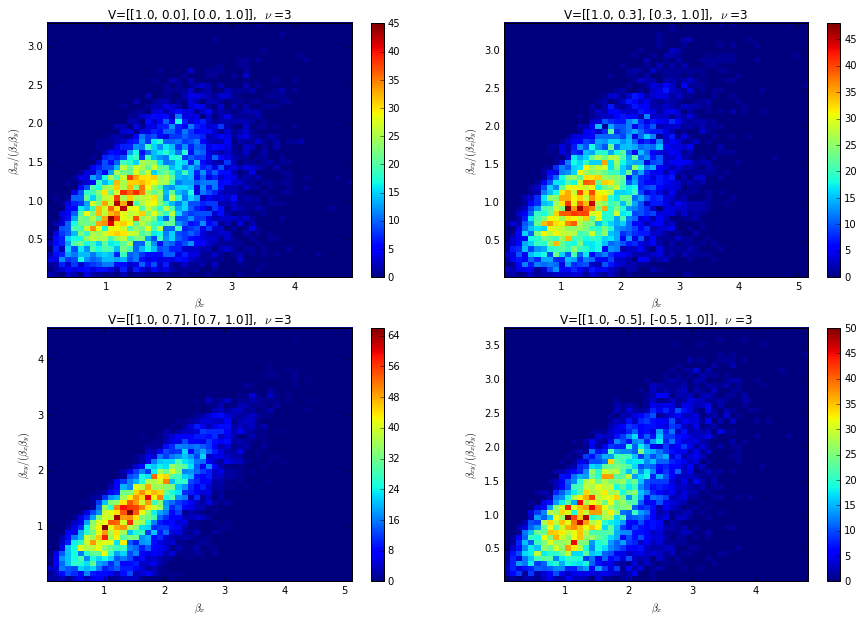

In [9]:
fig = plt.figure(figsize=(15,10))

Vs = [V2(1., a) for a in [0., .3, .7, -.5]]
nu = 3

for i in range(4):
    print("i={}".format(i), end="\t")
    V = Vs[i]
    sig_x, roh = sig_x_roh(V, nu, it=10000)
    
    ax = fig.add_subplot(2,2,i+1)
    _ = plt.hist2d(sig_x, roh, (50,50))
    ax.set_title("V={},  $\\nu$ ={}".format(V, nu))
    ax.set_xlabel("$\\beta_x$")
    ax.set_ylabel("$\\beta_{xy}/(\\beta_x \\beta_y)$")
    plt.colorbar()

print("inverse-Wishart Distribution: beta = S^-1")
plt.show()

<h2>Generalised Wishart Process</h2>
<h5>Reference: https://arxiv.org/pdf/1101.0240.pdf</h5>

In [8]:
kernel = lambda t1, t2, theta: theta[0]*np.exp(-1/theta[1]*np.square(t1-t2))

#rand_U = lambda D, nu: np.random.multivariate_normal(mean=np.zeros(D), cov=np.eye(D), size=nu).T
rand_Uid = lambda K: np.random.multivariate_normal(np.zeros(len(K)), K) 

nu = 2
D = 2

N = 100
t_start = 0
t_end = 5
t = np.linspace(t_start, t_end, N)

theta = [1, 0.5]
K = [[kernel(t1, t2, theta) for t1 in t] for t2 in t]

V = V2(1., 0.3)
L = np.linalg.cholesky(V + 0.01*np.eye(len(V)))
if D != len(V): print("D != len(V)")

U = np.zeros((N,D,nu))
for d in range(D):
    for i in range(nu):
        U[:, d, i] = rand_Uid(K)
        
Kt = np.array( [np.dot( L.dot(U[i]) , L.dot(U[i]).T ) for i in range(N)] )

In [9]:
X_grid, Y_grid = np.mgrid[-4:4:.1, -4:4:.1]
XY = np.zeros(X_grid.shape + (2,))
XY[:,:,0] = X_grid
XY[:,:,1] = Y_grid

plt.figure(figsize=(20,10))

plots_per_row = 10

gspec = gridspec.GridSpec(int(np.ceil(float(N)/plots_per_row)), plots_per_row)
gspec.update(wspace=0.01, hspace=0.01)

px, py = 0, 0
for i in range(N):
    if N > 50:
        print("N too big. Chose a smaller one (<= 50).")
        break
    ax = plt.subplot(gspec[py, px])
    
    if px != 0: ax.axes.get_yaxis().set_visible(False)
    px += 1
    if px == plots_per_row: 
        px = 0
        py += 1

    normal2d = multivariate_normal(mean=np.zeros(2), cov=Kt[i])
    plt.contour(X_grid,Y_grid, normal2d.pdf(XY), [0.005, 0.01, 0.03, 0.06])

plt.show()

N too big. Chose a smaller one (<= 50).


0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 

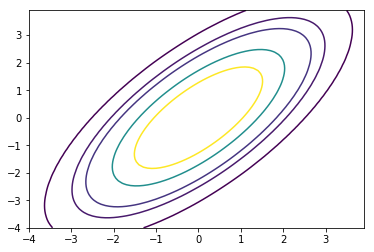

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()

def animate(i):
    print(i, end=" ")
    plt.clf()
    normal2d = multivariate_normal(mean=np.zeros(D), cov=Kt[i])
    cont = plt.contour(X_grid,Y_grid, normal2d.pdf(XY), [0.001, 0.005, 0.01, 0.03, 0.06] )
    return cont

frames = N
interval = 200 # delay between frames in milliseconds
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frames)
anim.save('animation.mp4')

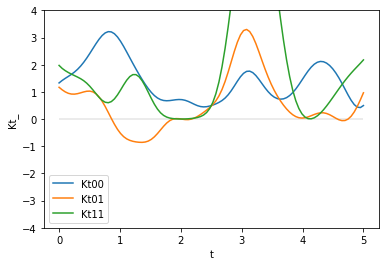

In [11]:
#plot Kt
fig = plt.figure()
plt.plot(t, Kt[:,0,0], label="Kt00")
plt.plot(t, Kt[:,0,1], label="Kt01")
plt.plot(t, Kt[:,1,1], label="Kt11")
plt.hlines(0, 0, 5, alpha=0.1)
plt.legend()
plt.xlabel('t')
plt.ylabel('Kt_')
plt.ylim([-4,4])
plt.show()

In [9]:
Kt.shape

(100, 2, 2)

<h3>Tests</h3>

In [7]:
gspec.update?

In [8]:
"""
X_grid, Y_grid = np.mgrid[-2:2:.1, -2:2:.1]
XY = np.zeros(X_grid.shape + (2,))
XY[:,:,0] = X_grid
XY[:,:,1] = Y_grid

fig = plt.figure(figsize=(20,10))
plots_per_row = 10
for i in range(N):
    ax = fig.add_subplot(np.ceil(float(N)/plots_per_row), plots_per_row, i+1)

    normal2d = multivariate_normal(mean=np.zeros(2), cov=Kt[i])
    plt.contour(X_grid,Y_grid, normal2d.pdf(XY), [0.03, 0.06])

plt.show()
"""

'\nX_grid, Y_grid = np.mgrid[-2:2:.1, -2:2:.1]\nXY = np.zeros(X_grid.shape + (2,))\nXY[:,:,0] = X_grid\nXY[:,:,1] = Y_grid\n\nfig = plt.figure(figsize=(20,10))\nplots_per_row = 10\nfor i in range(N):\n    ax = fig.add_subplot(np.ceil(float(N)/plots_per_row), plots_per_row, i+1)\n\n    normal2d = multivariate_normal(mean=np.zeros(2), cov=Kt[i])\n    plt.contour(X_grid,Y_grid, normal2d.pdf(XY), [0.03, 0.06])\n\nplt.show()\n'